In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as th
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
from scripts import *

In [8]:
img_dim = (3, 32, 64)
data_dir1 = "../potsdam_data/potsdam_cars_all"
data_dir2 = "../potsdam_data/artificial_cars"

transform1 = transforms.Compose([transforms.Resize(img_dim[1:]),
                                transforms.ToTensor(),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomVerticalFlip(p=0.5),
                                transforms.ColorJitter(hue=[-0.1, 0.1]),
                                transforms.Normalize([0.5], [0.5])])
transform2 = transforms.Compose([transforms.Resize(img_dim[1:]),
                                 transforms.ToTensor(),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomVerticalFlip(p=0.5),
                                 transforms.Normalize([0.5], [0.5])])

potsdam = PostdamCarsDataModule(
    data_dir1, img_size=img_dim[1:], batch_size=5000,
    data_dir2=data_dir2, transform=transform1, transform2=transform2)
potsdam.setup()
data = potsdam.train_dataloader()
real, fake = next(iter(data))

In [69]:
real_numpy.mean(axis=1).shape

(5000,)

In [70]:
real_numpy = real.cpu().numpy().reshape(len(real), -1)
fake_numpy = fake.cpu().numpy().reshape(len(real), -1)

real_mean = real_numpy.mean(axis=0)
fake_mean = fake_numpy.mean(axis=0)

real_numpy -= real_numpy.mean(axis=0)
fake_numpy -= fake_numpy.mean(axis=0)

In [71]:
pca_real = PCA(500).fit(real_numpy)
pca_fake = PCA(500).fit(fake_numpy)

In [72]:
z_real = pca_real.transform(real_numpy)
z_fake = pca_fake.transform(fake_numpy)

In [73]:
Q = np.eye(500)

In [143]:
import tqdm 

for _ in range(1):
    A = []
    B = []
    
    for i in tqdm.tqdm(range(len(z_real))):
        j = np.argmin(np.linalg.norm(z_real[i].dot(Q) - z_fake, axis=1))
        k = np.argmin(np.linalg.norm(z_real.dot(Q) - z_fake[j], axis=1))
        if k == i:
            A.append(z_real[i])
            B.append(z_fake[j])
    
    A = np.array(A)
    B = np.array(B)
    
    U, S, V = np.linalg.svd(A.T.dot(B))
    Q = U.dot(V.T)
    
T = pca_real.components_.T.dot(Q).dot(pca_fake.components_)

100%|██████████| 5000/5000 [01:00<00:00, 82.81it/s]


In [141]:
from sklearn.preprocessing import MinMaxScaler

real_looking = fake_numpy.dot(T.T) + real_mean
real_looking = MinMaxScaler().fit_transform(real_looking)

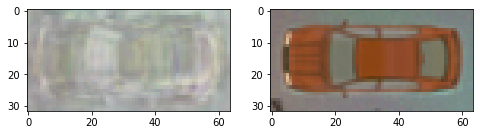

In [142]:
i = 22
a = (real_looking[i].reshape(3, 32, 64).transpose(1, 2, 0) + 1) / 2
b = (fake_numpy[i].reshape(3, 32, 64).transpose(1, 2, 0) + 1) / 2
#b = (real_numpy[i].reshape(3, 32, 64).transpose(1, 2, 0) + 1) / 2

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(a)
plt.subplot(1, 2, 2)
plt.imshow(b)